**Credit Card Approval Prediction**

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk. 

**Objective**

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. 

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load and preview the data
application = pd.read_csv("application_record.csv")
application.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
272450,6092229,M,N,Y,1,103500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14496,-178,1,0,0,0,Laborers,3.0
69757,5258193,F,N,Y,1,90000.0,Working,Secondary / secondary special,Married,House / apartment,-13329,-1159,1,0,0,0,Cooking staff,3.0
340245,6396833,M,Y,Y,1,288000.0,State servant,Higher education,Married,House / apartment,-13265,-2707,1,0,0,0,Core staff,3.0
45940,5139404,M,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22044,365243,1,0,0,0,NaN,2.0
86840,5345227,F,Y,N,0,149850.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,-14041,-915,1,0,0,0,Sales staff,2.0


In [ ]:
credit = pd.read_csv('credit_record.csv')
credit.sample(5)

,ID,MONTHS_BALANCE,STATUS
303927,5028815,-21,0
968846,5139575,-9,C
937049,5126800,-5,0
394549,5046234,-34,0
113334,5010020,-6,C


In [ ]:
application.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [ ]:
application.shape

(438557, 18)

Data Processing 

In [ ]:
#Rename the columns
application.columns = ['id','gender','owns_car','owns_property','no_of_children','total_income','income_type','education_type','family_status','housing_type','birthday','employment_duration','owns_mobile','has_work_phone','owns_phone','owns_email','occupation_type','family_size']
application.columns

Index(['id', 'gender', 'owns_car', 'owns_property', 'no_of_children',
       'total_income', 'income_type', 'education_type', 'family_status',
       'housing_type', 'birthday', 'employment_duration', 'owns_mobile',
       'has_work_phone', 'owns_phone', 'owns_email', 'occupation_type',
       'family_size'],
      dtype='object')

Change the categorical data values to discrete values i.e (1, 0)

In [ ]:
#Use sklearn preprocessing to Label Encoder to convert categorical data to numerical form for easy modelling
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [ ]:

application['gender'] = encode.fit_transform(application['gender'])
application['owns_car'] = encode.fit_transform(application['owns_car'])
application['owns_property'] = encode.fit_transform(application['owns_property'])
application['income_type'] = encode.fit_transform(application['income_type'])
application['education_type'] = encode.fit_transform(application['education_type'])
application['family_status'] = encode.fit_transform(application['family_status'])
application['housing_type'] = encode.fit_transform(application['housing_type'])
application['has_work_phone'] = encode.fit_transform(application['has_work_phone'])
application['owns_phone'] = encode.fit_transform(application['owns_phone'])
application['owns_email'] = encode.fit_transform(application['owns_email'])

Gender: Class mapping: F --> 0 M --> 1

Owns_car: Class mapping: N --> 0 Y --> 1

Owns_property: Class mapping: N --> 0 Y --> 1

Income_Type: Class mapping: Commercial associate --> 0 Pensioner --> 1 State servant --> 2 Student --> 3 Working --> 4

Education_Type: Class mapping: Academic degree --> 0 Higher education --> 1 Incomplete higher --> 2 Lower secondary --> 3 Secondary / secondary special --> 4

Family_status: Class mapping: Civil marriage --> 0 Married --> 1 Separated --> 2 Single / not married --> 3 Widow --> 4

Housing_Type: Class mapping: Co-op apartment --> 0 House / apartment --> 1 Municipal apartment --> 2 Office apartment --> 3 Rented apartment --> 4 With parents --> 5

Owns_mobile: Class mapping: 1 --> 0

has_work_phone: Class mapping: 0.0 --> 0 1.0 --> 1

owns_phone: Class mapping: 0.0 --> 0 1.0 --> 1

owns_email: Class mapping: 0.0 --> 0 1.0 --> 1

In [ ]:
#Preview dataset after change
application.sample(10)

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,occupation_type,family_size
141007,5677703,0,0,1,0,112500.0,1,4,1,1,-21060,365243,1,0,0,0,NaN,2.0
409823,6764813,1,1,1,0,292500.0,0,4,1,1,-18461,-3622,1,1,1,0,Drivers,2.0
437199,6211708,0,0,0,0,67500.0,4,4,4,1,-18890,-1947,1,1,1,0,Medicine staff,1.0
50620,5155753,0,0,1,0,225000.0,0,1,1,1,-13822,-6054,1,0,1,1,NaN,2.0
199745,5892280,0,1,1,0,144000.0,1,4,1,1,-20369,365243,1,0,0,0,NaN,2.0
280474,6120866,0,0,1,1,216000.0,4,4,1,1,-14837,-3699,1,0,0,0,NaN,3.0
395471,6688557,0,0,1,0,202500.0,4,1,0,1,-10022,-448,1,0,1,1,Accountants,2.0
322966,6277452,0,0,1,0,292500.0,2,1,2,1,-22218,-2542,1,0,1,1,Medicine staff,1.0
426720,7890950,0,1,1,0,112500.0,4,4,3,1,-24626,-2698,1,0,0,0,NaN,1.0
410970,6779995,1,1,1,0,171000.0,4,4,1,1,-16228,-3206,1,1,0,0,Low-skill Laborers,2.0


In [ ]:
application.isnull().any()

id                     False
gender                 False
owns_car               False
owns_property          False
no_of_children         False
total_income           False
income_type            False
education_type         False
family_status          False
housing_type           False
birthday               False
employment_duration    False
owns_mobile            False
has_work_phone         False
owns_phone             False
owns_email             False
occupation_type         True
family_size            False
dtype: bool

In [ ]:
application.isnull().sum()

id                          0
gender                      0
owns_car                    0
owns_property               0
no_of_children              0
total_income                0
income_type                 0
education_type              0
family_status               0
housing_type                0
birthday                    0
employment_duration         0
owns_mobile                 0
has_work_phone              0
owns_phone                  0
owns_email                  0
occupation_type        134203
family_size                 0
dtype: int64

In [ ]:
#Consider dropping occupation_type
#Check impact
application['occupation_type']

0                    NaN
1                    NaN
2         Security staff
3            Sales staff
4            Sales staff
               ...      
438552               NaN
438553          Laborers
438554       Sales staff
438555               NaN
438556       Sales staff
Name: occupation_type, Length: 438557, dtype: object

In [ ]:
#Drop occupation_type column since it has many missing values that may not be easy to fill.
#application.drop(['occupation_type'], axis = 1, inplace = True) 
application.head()

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,occupation_type,family_size
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
#Check for duplicates
application.loc[application.total_income == 315000.0].loc[application.income_type == 'Working'].loc[application.birthday == -10554].loc[application.employment_duration == -1194]

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,occupation_type,family_size


There are duplicate records in the dataset. They have all the same values except for the 'id'. 

In [ ]:
#Drop duplicate records so as to have one customer having just one id
application = application.drop_duplicates(subset=application.columns[1:])
application.loc[application.birthday == -10554].loc[application.employment_duration == -1194]

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,occupation_type,family_size
213,5009031,0,0,1,0,315000.0,4,4,3,1,-10554,-1194,1,0,0,0,Accountants,1.0


In [ ]:
#Once again check for null values
application.isnull().sum()

id                         0
gender                     0
owns_car                   0
owns_property              0
no_of_children             0
total_income               0
income_type                0
education_type             0
family_status              0
housing_type               0
birthday                   0
employment_duration        0
owns_mobile                0
has_work_phone             0
owns_phone                 0
owns_email                 0
occupation_type        27477
family_size                0
dtype: int64

In [ ]:
application['owns_phone'].isnull().values

array([False, False, False, ..., False, False, False])

In [ ]:
#Check if the same record is missing data values on has_work_phone, owns_phone,owns_email,family_size
application.loc[application['id'] == 6089954]

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,occupation_type,family_size


In [ ]:
#Drop the last record in the application dataset since it has several values missing
#application = application.drop(270804)
#application.isnull().any()

In [ ]:
#Rename the columns of credit
credit.columns = ['id','months_balance','status']
credit.sample(10)

,id,months_balance,status
251787,5023009,-25,0
616407,5079206,-52,0
632187,5088938,-21,0
79095,5005282,-38,C
500957,5061033,-5,C
731450,5100042,-25,C
480710,5060051,-15,X
385031,5045657,-10,C
541119,5065492,-26,X
399272,5046506,-1,C


In [ ]:
#Merge the application and credit datasets for easier analysis
data = pd.merge(application, credit, how='inner', on=['id'])
data.head()

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,occupation_type,family_size,months_balance,status
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


Exploratory Data Analysis

In [ ]:
data.describe()

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,family_size,months_balance
count,2.191730e+05,219173.000000,219173.000000,219173.000000,219173.000000,2.191730e+05,219173.000000,219173.000000,219173.000000,219173.000000,219173.000000,219173.000000,219173.0,219173.000000,219173.000000,219173.000000,219173.000000,219173.000000
mean,5.076276e+06,0.348998,0.375516,0.658941,0.417291,1.827611e+05,2.341023,3.142705,1.367655,1.246376,-16223.989433,62009.668755,1.0,0.225333,0.292527,0.084778,2.185205,-19.776213
std,4.064917e+04,0.476655,0.484257,0.474066,0.768615,1.009426e+05,1.744307,1.319734,0.956532,0.882553,4150.124178,140043.926967,0.0,0.417803,0.454924,0.278551,0.927131,14.216240
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.037063e+06,0.000000,0.000000,0.000000,0.000000,1.125000e+05,1.000000,1.000000,1.000000,1.000000,-19682.000000,-3154.000000,1.0,0.000000,0.000000,0.000000,2.000000,-30.000000
50%,5.069239e+06,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.000000,4.000000,1.000000,1.000000,-15909.000000,-1517.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.112992e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,-12752.000000,-353.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150479e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


Categorizing the records as defaulted or not defaulted.
Any record with status (0,1,2,3,4,5) should be labelled as defaulted whereas, any record with status (X, C) should be labelled as not defaulted.

In [ ]:
defaulters= ['0','1','2','3','4','5']

data['default_status'] = np.where(data.status.isin(defaulters), 1, 0)
data.head()

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,owns_mobile,has_work_phone,owns_phone,owns_email,occupation_type,family_size,months_balance,status,default_status
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0,0,C,0
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0,-1,C,0
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0,-2,C,0
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0,-3,C,0
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0,-4,C,0


Univariate Analysis

Categorical data
Have a look at the distribution of each of the categorical data i.e gender, owns_car, income_type, education_type, family_status, housing_type, owns_mobile, has_work_phone, owns_phone, owns_email, occupation_type

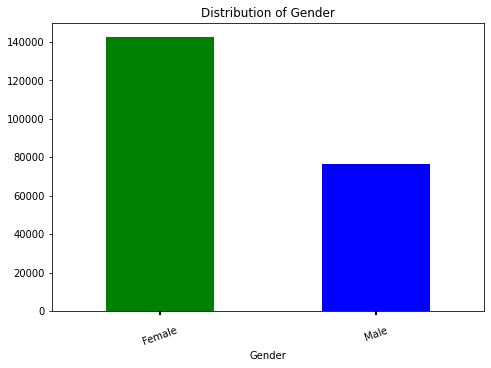

In [ ]:
# create a bar plot of the 'gender' variable
fig=plt.figure()
cx=fig.add_axes([0,0,1,1])
data.gender.value_counts().plot(kind = 'bar', rot = 0, color = ['green', 'blue'])
cx.set_xlabel('Gender')
cx.set_title('Distribution of Gender')
cx.set_xticklabels(['Female','Male'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=20);

In [ ]:
# get the value counts of the 'owns_car' variable
data.owns_car.value_counts()

0    136870
1     82303
Name: owns_car, dtype: int64

In [ ]:
# get the value counts of the 'owns_property' variable
data.owns_property.value_counts()

1    144422
0     74751
Name: owns_property, dtype: int64

In [ ]:
# get the value counts of the 'owns_mobile' variable
data.owns_mobile.value_counts()

1    219173
Name: owns_mobile, dtype: int64

Every customer owns a mobile phone hence the feature may not be of much help in analysis or modelling.

In [ ]:
#Drop the owns_mobile feature
data.drop(['owns_mobile'], axis = 1, inplace = True) 
data.head()

,id,gender,owns_car,owns_property,no_of_children,total_income,income_type,education_type,family_status,housing_type,birthday,employment_duration,has_work_phone,owns_phone,owns_email,occupation_type,family_size,months_balance,status,default_status
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,NaN,2.0,0,C,0
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,NaN,2.0,-1,C,0
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,NaN,2.0,-2,C,0
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,NaN,2.0,-3,C,0
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,NaN,2.0,-4,C,0


In [ ]:
# get the value counts of the 'has_work_phone' variable
data.has_work_phone.value_counts()

0    169786
1     49387
Name: has_work_phone, dtype: int64

In [ ]:
# get the value counts of the 'owns_phone' variable
data.owns_phone.value_counts()

0    155059
1     64114
Name: owns_phone, dtype: int64

In [ ]:
# get the value counts of the 'owns_email' variable
data.owns_email.value_counts()

0    200592
1     18581
Name: owns_email, dtype: int64

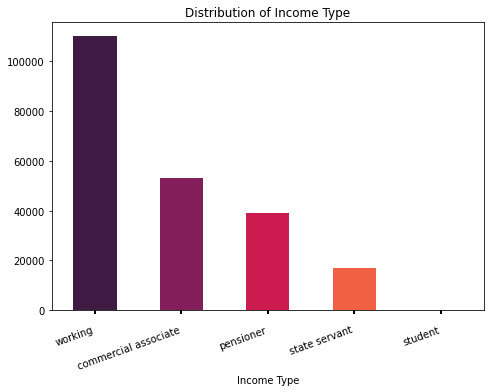

In [ ]:
# create a bar plot of the 'income_type' variable
fig=plt.figure()
bx=fig.add_axes([0,0,1,1])
data.income_type.value_counts().plot(kind = 'bar', rot = 15, 
                                    color = sns.color_palette('rocket', data.income_type.nunique()))
bx.set_xlabel('Income Type')
bx.set_title('Distribution of Income Type')
bx.set_xticklabels(['working','commercial associate','pensioner','state servant','student'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=20);
plt.xticks(ha = 'right');


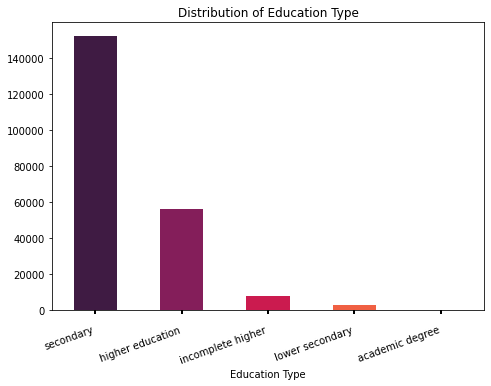

In [ ]:
# create a bar plot of the 'education_type' variable
fig=plt.figure()
dx=fig.add_axes([0,0,1,1])
data.education_type.value_counts().plot(kind = 'bar', rot = 15, 
                                    color = sns.color_palette('rocket', data.education_type.nunique()))
dx.set_xlabel('Education Type')
dx.set_title('Distribution of Education Type')
dx.set_xticklabels(['secondary','higher education','incomplete higher','lower secondary','academic degree'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=20)
plt.xticks(ha = 'right');


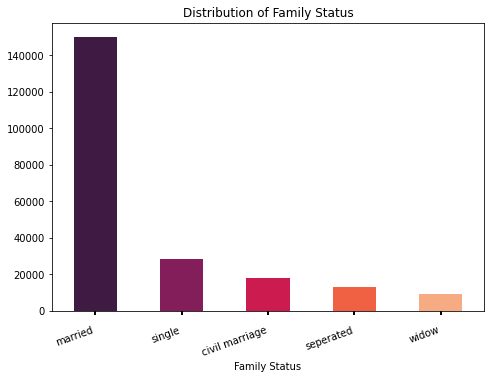

In [ ]:
# create a bar plot of the 'family_status' variable
fig=plt.figure()
fx=fig.add_axes([0,0,1,1])
data.family_status.value_counts().plot(kind = 'bar', rot = 15, 
                                    color = sns.color_palette('rocket', data.family_status.nunique()))
fx.set_xlabel('Family Status')
fx.set_title('Distribution of Family Status')
fx.set_xticklabels(['married','single','civil marriage','seperated','widow'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=20)
plt.xticks(ha = 'right');


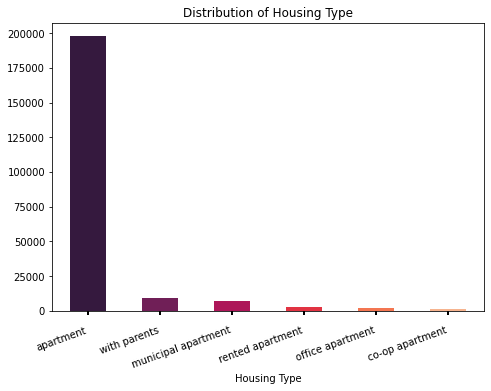

In [ ]:
# create a bar plot of the 'housing_type' variable
fig=plt.figure()
gx=fig.add_axes([0,0,1,1])
data.housing_type.value_counts().plot(kind = 'bar', rot = 15, 
                                    color = sns.color_palette('rocket', data.housing_type.nunique()))
gx.set_xlabel('Housing Type')
gx.set_title('Distribution of Housing Type')
gx.set_xticklabels(['apartment','with parents','municipal apartment','rented apartment','office apartment','co-op apartment'])
plt.tick_params(axis="x",direction="out",length=4,width=2,pad=10,labelsize=10,labelbottom=True,labelrotation=20);
plt.xticks(ha = 'right');


Continuous Data

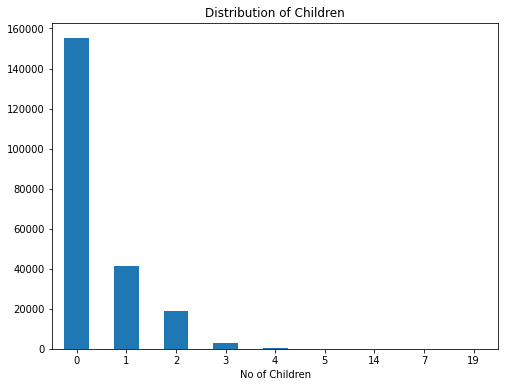

In [ ]:
# create a bar plot of the 'no_of_children' variable
plt.figure(figsize = (8, 6))
data.no_of_children.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel('No of Children')
plt.title('Distribution of Children')
plt.show()

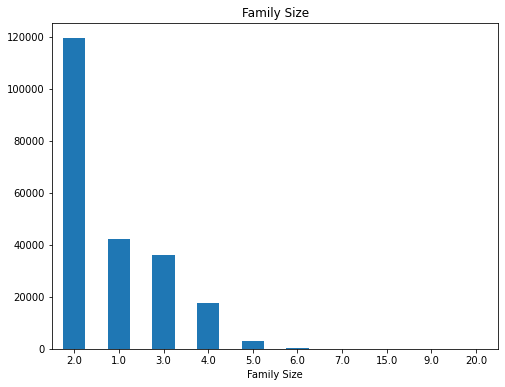

In [ ]:
# create a bar plot of the 'family_size' variable
plt.figure(figsize = (8, 6))
data.family_size.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel('Family Size')
plt.title('Family Size')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


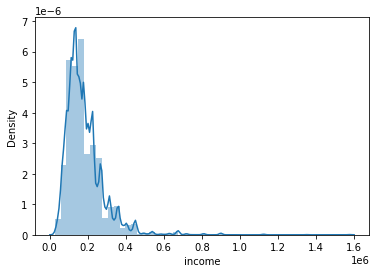

In [ ]:
#Plot for income distribution
income = pd.Series(data.total_income, name="income")
sns.distplot(income)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


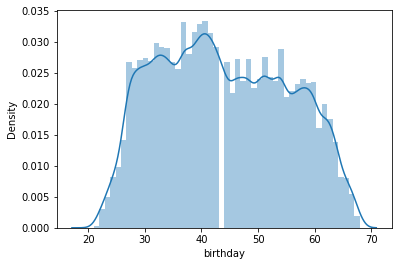

In [ ]:
#Birth days
birth_days = data.birthday.apply(lambda x: int(-x // 365))
sns.distplot(birth_days)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


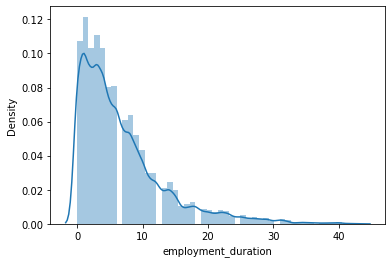

In [ ]:
#Employment duration
employment_duration = data[data.employment_duration<0].employment_duration.apply(lambda x: int(-x // 365))
sns.distplot(employment_duration)
plt.show()

Bivariate Analysis

In [ ]:
corr = data.corr()

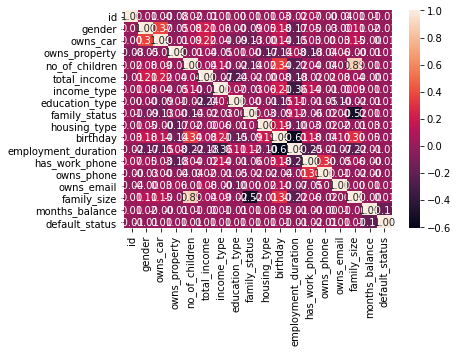

In [ ]:
# create a heatmap of the correlations of the variables in the dataset



# Generate heat map, allow annotations and place floats in map
sns.heatmap(corr, annot = True, fmt = ".2f")

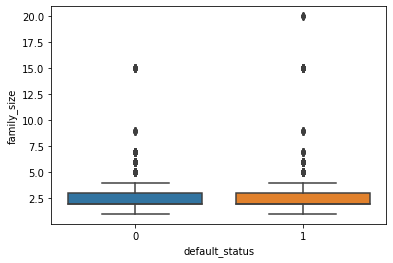

In [ ]:
#boxplot for family size against dafault status
sns.boxplot(x = 'default_status', y = 'family_size', data = data)
plt.show()

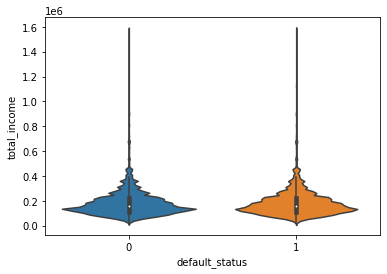

In [ ]:
#violinplot for family size against dafault status
sns.violinplot(x = 'default_status', y = 'total_income', data = data, size = 8)
plt.show()

In [ ]:
#Pair plot to show relationship between features in the dataset
#sns.pairplot(data.sample(1000))

## Feature selection for our model

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


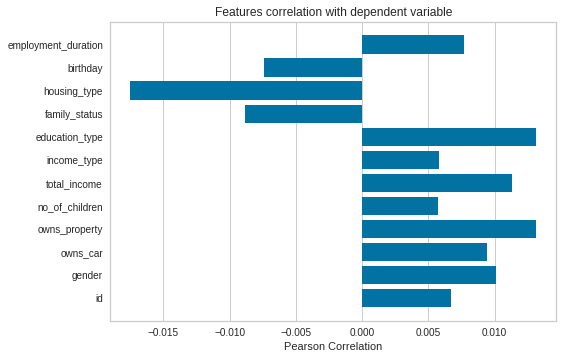

In [ ]:
target=data['default_status']
features=data[['owns_car','owns_property','no_of_children','total_income','income_type','education_type',
                       'family_status','housing_type','employment_duration','has_work_phone','owns_phone','family_size']]
feature_names=data.columns
from yellowbrick.target import FeatureCorrelation
visual=FeatureCorrelation(labels=feature_names,method='pearson')
visual.fit(features,target)
visual.poof()

In [ ]:
X=data[['gender','no_of_children','owns_car','owns_property','education_type','income_type','total_income','employment_duration']]
Y=data['default_status']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.75,
                                               test_size=0.25,
                                               random_state=123,
                                              stratify =Y)

In [ ]:
print("Training data: ", train_X.shape)
print("Test data: ", test_X.shape)

Training data:  (164379, 8)
Test data:  (54794, 8)


In [ ]:
classifier=LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')

In [ ]:
classifier.fit(train_X,train_Y)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction=classifier.predict(test_X) 
print("Predicted values:", prediction)

Predicted values: [0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix
print('Accuracy Score is {:.5}'.format(accuracy_score(test_Y, prediction)))
print(pd.DataFrame(confusion_matrix(test_Y,prediction)))

sns.set_style('white') 
class_names = ['0','1']

Accuracy Score is 0.61932
       0  1
0  33935  0
1  20859  0


In [ ]:
tree_classifier=DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)

In [ ]:
tree_classifier.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1024, splitter='best')

In [ ]:
tree_prediction=classifier.predict(test_X) 
print("Predicted values:", tree_prediction)

Predicted values: [0 0 0 ... 0 0 0]


In [ ]:
print('Accuracy Score is {:.5}'.format(accuracy_score(test_Y, tree_prediction)))
print(pd.DataFrame(confusion_matrix(test_Y,tree_prediction)))

Accuracy Score is 0.61932
       0  1
0  33935  0
1  20859  0


In [ ]:

from sklearn.ensemble import RandomForestClassifier



In [ ]:

forest_classifier=RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16)

In [ ]:
forest_classifier.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
forest_prediction=forest_classifier.predict(test_X)
print("Prediction values: ",forest_prediction)

Prediction values:  [0 0 0 ... 0 0 0]


In [ ]:
print('Accuracy Score is {:.5}'.format(accuracy_score(test_Y, forest_prediction)))
print(pd.DataFrame(confusion_matrix(test_Y,forest_prediction)))

Accuracy Score is 0.6706
       0     1
0  33391   544
1  17505  3354


**Saving the model**

In [ ]:
# picking the best algorithim and then saving your model
#using joblib
#joblib_file= "joblib_classifier_model.pkl"
#joblib.dump(forest_classifier,joblib_file)
#reload the saved model using joblib
#score = joblib_model.score(test_X,test_Y)
#print("Test score: {0: 2f} %".format(100*score))
#use it to predict the target values
#predict_y=joblib_classifier_model.predict(test_X)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')